# Assignment 2
## Oja Rule

In [17]:
import numpy as np
from matplotlib import pyplot as plt

In [18]:
#load dataset
u = np.loadtxt("../lab2_1_data.csv", delimiter=",", unpack=True)

In [19]:
def linear_model(u,w):
    return np.dot(u,w)

Epoch 0 of 1000
Epoch 100 of 1000
Epoch 200 of 1000
Epoch 300 of 1000
Epoch 400 of 1000
Epoch 500 of 1000
Epoch 600 of 1000
Epoch 700 of 1000
Epoch 800 of 1000
Epoch 900 of 1000
w1 [-1.84810583e-001 -1.85160909e-001 -1.86186081e-001 ... -5.24505929e+251
 -5.27527349e+251 -5.31955037e+251]


/tmp/ipykernel_7647/814605066.py:34: RuntimeWarning: overflow encountered in square
  w_norm = np.sqrt(w1**2+w2**2)
/tmp/ipykernel_7647/814605066.py:34: RuntimeWarning: overflow encountered in add
  w_norm = np.sqrt(w1**2+w2**2)


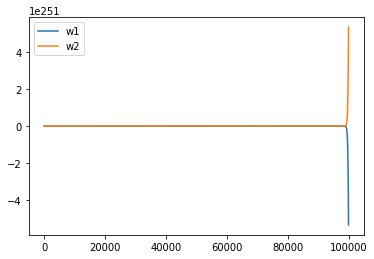

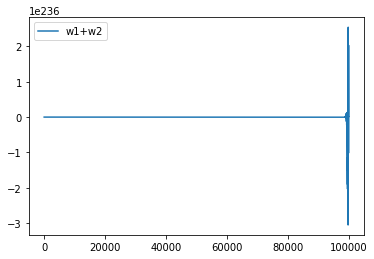

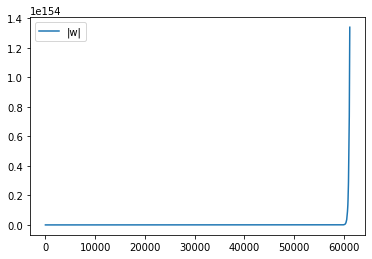

In [22]:
#3) Implement Subtractive Normalization
w = np.random.rand(2)*2 - 1 

eta = 0.01
threshold = 1e-3
epochs = 1000

w_hist = w
wold = w

Nu = len(u[0])
n = np.ones(Nu)

for N in range (epochs):
    if N % (epochs/10) == 0:
        print(f"Epoch {N} of {epochs}")

    uu = np.random.permutation(u)  

    for i in range (len(uu)):
        v = linear_model(uu[i], w)
        w = w + eta*v*uu[i] - eta*(v*np.dot(n,uu[i])*n)/Nu

        w_hist = np.vstack((w_hist, w))
    
    if np.linalg.norm(w-wold) < threshold:
        print('Stop')
        break
    wold = w

w1 = (np.transpose(w_hist))[0]
print('w1',w1)
w2 = (np.transpose(w_hist))[1]
w_norm = np.sqrt(w1**2+w2**2)
t=np.arange(0,len(w1))


plt.figure()
plt.plot(t,w1, label='w1')
plt.plot(t,w2, label='w2')
plt.legend()

plt.figure()
plt.plot(t,w1+w2, label='w1+w2')
plt.legend()

plt.figure()
plt.plot(t,w_norm, label='|w|')
plt.legend()
plt.show()




[[ 0.32640973 -0.25904598]
 [-0.25904598  0.321666  ]]


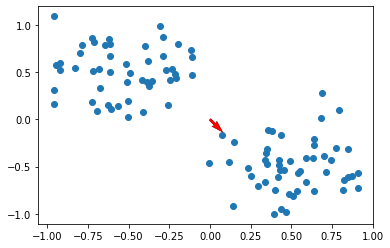

In [21]:
#P1
u1 = (np.transpose(u))[0]
u2 = (np.transpose(u))[1]
plt.scatter(u1,u2)
plt.quiver(*w)


Q = np.array([[0,0], [0,0]])
for i in range (len(u)):
     Q = Q + np.outer(u[i],u[i])

Q = Q/len(u)

print(Q)
eig_val, eig_vec = np.linalg.eig(Q)
#print(eig_val)
n = np.argmax(eig_val)
max_eigvect = eig_vec[:,n]


plt.quiver(max_eigvect[0], max_eigvect[1], color='red')

plt.show()

